Para que o código funcione corretamente, faz-se necessário a importação de todas as bibliotecas necessárias. Portanto o bloco abaixo se encarrega da importação das bibliotecas:

In [2]:
# Importar as bibliotecas necessárias:

import matplotlib.pyplot as plt     # Para plotar os gráficos
import numpy as np                  # Para uso de algebra linear

from matplotlib import cm           # Exibir gráficos em 3D

# Mostrar os gráficos corretamente:
%matplotlib inline                  

Para que exista o aprendizado de máquina, é necessário que exista dados de entradas e saídas para treinamento e avaliação do modelo que será criado. Os dados abaixos se referem aos dados entregues no enunciado do exercício, porém gerados pela biblioteca numpy, enquanto a saída é a função na qual nosso algoritmo tentará aproximar por meio de seu modelo gerado.

In [3]:
# Definindo a quantidade de amostras:
M = 1000

# Definindo a ENTRADA (features):
x0 = np.ones((M,1))
x  = (np.random.uniform(-5, 5, M)).reshape(M, 1)

# Definindo o RUÍDO:
w = np.random.normal(0,10,(M, 1))

# Definindo a SAÍDA (target):
y = 3 + 1.5 * x + 2.3 * x**2 + w

# Definição da função original de saida:
y_org = 3 + 1.5 * x + 2.3 * x**2

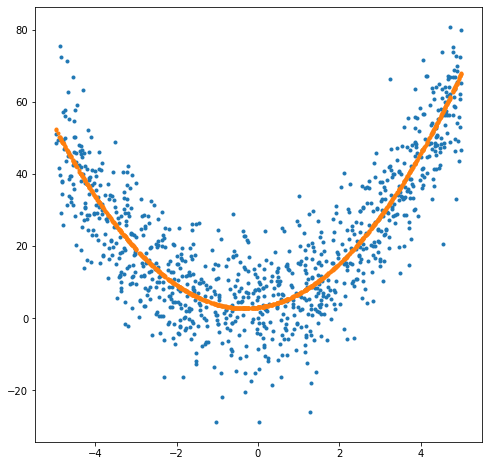

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, '.')
plt.plot(x, y_org, '.')
plt.show()

In [5]:
# Criando a SUPERFÍCIE DE ERRO:

# Definindo o número de iterações:
N = 400

# Definindo valores lINEARMENTE espaçados para os PESOS
a0 = np.linspace(-10.0, 10.0, N)
a1 = np.linspace(-10.0, 10.0, N)

# Criação da malha para plotagem gráfica
A0, A1 = np.meshgrid(a0, a1)

# Criando o vetor para armazenamento dos valores de ERRO:
J = np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat = A0[iter1][iter2] + A1[iter1][iter2] * x
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

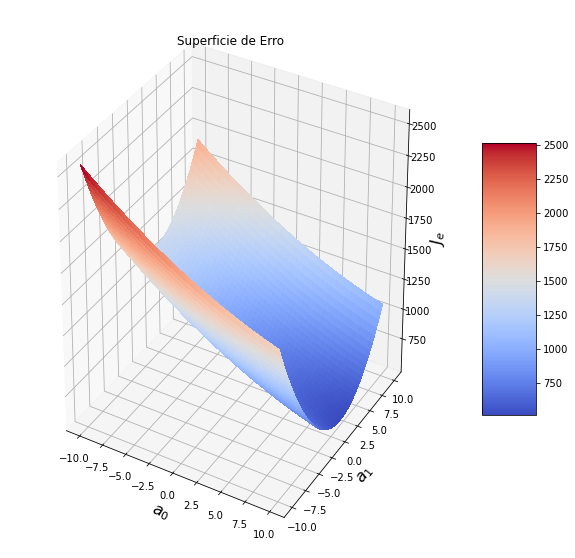

In [6]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

Para executar a formula fechada e encontrar os pesos ótimos é necessário concatenar todos os valores de x (x0, x1, x2) dentro de uma matriz para depois por meio da função hipôtese encontrar os valores:

In [7]:
X = np.c_[x0, x, x**2]                  # Concatena em uma matriz todos os X's

# Aplicação da formula fechada para encontrar os pesos ÓTIMOS:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = a_opt[0, 0] + a_opt[1, 0] * x + a_opt[2, 0] * x ** 2
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2))

Simplesmente faz a impressão dos valores encontrados:

In [8]:
# Imprimindo os valores encontrados pela FORMULA FECHADA:

print(' O valor de a0 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print(' O valor de a1 ótimo encontrado é: {}'.format(a_opt[1, 0]))
print(' O valor de a2 ótimo encontrado é: {}'.format(a_opt[2, 0]))

 O valor de a0 ótimo encontrado é: 2.854802661668766
 O valor de a1 ótimo encontrado é: 1.4722477881338494
 O valor de a2 ótimo encontrado é: 2.2260141558164013


Resolvendo por meio do GRADIENTE DESCENDENTE BATELADA: 

In [9]:
# Definindo o PASSO DE APRENDIZAGEM (alpha):
alpha = 0.007

# Criando a matriz de pesos final para ARMAZENAMENTO:
a = np.zeros((3, 1))

# Definindo os PESOS INICIAIS:
a[0, 0] = -10
a[1, 0] = -10
a[2, 0] = -10

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((3, M+1))

# Criando a matriz de erro 
jgd = np.zeros(M+1)

# Definindo o primeiro valor do erro
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [10]:
# Definindo a iteração inicial
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICO:
grad_hist = np.zeros((3, M))

In [11]:
# LOOP do GRADIENTE:
while iteration < M:
    
    
    gradients = -(2.0/M) * X.T.dot(y - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    grad_hist[2, iteration] = gradients[2, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    a_hist[2, iteration + 1] = a[2, 0]
    
    y_hat = a[0, 0] + a[1, 0] * x + a[2, 0] * x**2
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - y_hat), 2))
                                       
    iteration = iteration + 1

In [12]:
# Imprimindo os valores encontrados pelo GRADIENTE:

print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[2, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: 2.8288398969973922
O valor de a1 ótimo encontrado pelo gradiente é: 1.4720823172735609
O valor de a2 ótimo encontrado pelo gradiente é: 2.2277528850689587


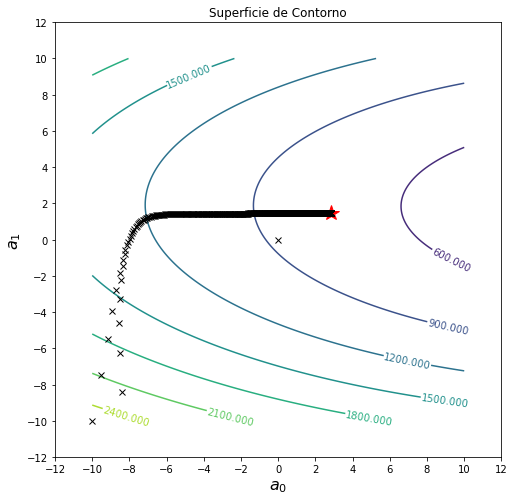

In [13]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

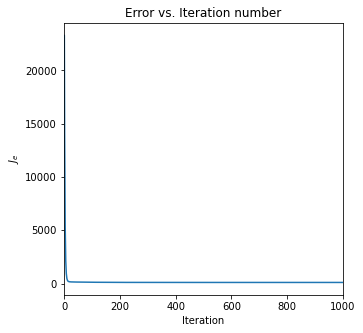

In [14]:
# Plotando o gráfico do ERRO vs NÚMERO DE ITERAÇÕES:

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()